In [87]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line_aa as draw_line
from IPython import display

In [192]:
shape = (180, 180)
line_list = [#{
#     "bar_speed" : 50, # px/s
#     "bar_thick" : 3, # px (not implemented)
#     "bar_slope" : np.deg2rad(20), # ang from x in rad
#     "bar_direction" : np.array([1, -0.2]), # x and y components of the motion
#     "bar_length" : 30,
#     "pos_start" : [0 , 0]
# },
# {
#     "bar_speed" : 100, # px/s
#     "bar_thick" : 3, # px (not implemented)
#     "bar_slope" : np.deg2rad(35), # ang from x in rad
#     "bar_direction" : np.array([1, -0.2]), # x and y components of the motion
#     "bar_length" : 30,
#     "pos_start" : [0 , 40]
# },
{
    "bar_speed" : 40, # px/s
    "bar_thick" : 3, # px (not implemented)
    "bar_slope" : np.array([1, 1.5]), # ang from x in rad
    "bar_direction" : np.array([1.0, 0.1]), # rad
    "bar_length" : 30,
    "pos_start" : [0, 3]
 },
# {
#     "bar_speed" : 100, # px/s
#     "bar_thick" : 3, # px (not implemented)
#     "bar_slope" : np.deg2rad(75), # ang from x in rad
#     "bar_direction" : np.array([1, -0.2]), # x and y components of the motion
#     "bar_length" : 30,
#     "pos_start" : [0, 120]
# },
# {
#     "bar_speed" : 100, # px/s
#     "bar_thick" : 3, # px (not implemented)
#     "bar_slope" : np.deg2rad(90), # ang from x in rad
#     "bar_direction" : np.array([1, -0.2]), # x and y components of the motion
#     "bar_length" : 30,
#     "pos_start" : [0, 160]
# }
]
sim_duration = 5. # seconds
time_res = 0.01 # sec

In [193]:
def plot_line(shape, line, t):
    img = np.zeros(shape)
    pos_start = line["pos_start"]
    bar_direction = line["bar_direction"]
    bar_speed = line["bar_speed"]
    bar_slope = line["bar_slope"]
    bar_length = line["bar_length"]
    
    pos_f = (np.array(pos_start + bar_direction * bar_speed * t))
    print(pos_f)
    poss = np.array([
        [np.floor(pos_f[0]), np.floor(pos_f[1])],
        [np.floor(pos_f[0]), np.ceil(pos_f[1])],
        [np.ceil(pos_f[0]), np.floor(pos_f[1])],
        [np.ceil(pos_f[0]), np.ceil(pos_f[1])],
    ])
    for pos in poss[0:1]:
        #pos = pos.astype(int)
        pos = np.floor(pos_f).astype(int)
        #print(pos)
        pos_end = [pos[0] + bar_slope[0]*bar_length, pos[1] + bar_slope[1]*bar_length]
        pos_end = np.array(pos_end).astype(int)
        rr, cc, val = draw_line(pos[1], pos[0], pos_end[1], pos_end[0])
        mask = [True if r>=0 and r < shape[0] and c>=0 and c<shape[1] else False for r, c in zip(rr, cc)]
        rr = rr[mask]
        cc = cc[mask]
        img[rr, cc] = 1
    
    img = np.flip(img, axis=0)
    
    return img

In [194]:
def convert2event_stream(img_list):
    events = []
    for t in range(img_list.shape[0]):
        time = t * time_res
        for i, e in enumerate(img_list[t, :, :].flatten()):
            if e == 0:
                continue
            y, x = np.unravel_index(i, img_list[0].shape)
            events.append([time, x, y, 1])
    return np.array(events)

In [195]:
img_list = []
prev = np.zeros(shape)
for t in np.linspace(0.0, sim_duration, int(sim_duration / time_res)):
    img = np.zeros(shape)
    for line in line_list:
        img += plot_line(shape, line, t)
    tmp = np.copy(img)
    
    #only new pixels should count
    mask = np.bitwise_xor(prev.astype(int), np.ones(prev.shape).astype(int))
    #print(img)
    img = img * mask
    #print(mask)
    #print(img)
    prev = tmp
    #break
    img_list.append(img)

[0. 3.]
[0.4008016  3.04008016]
[0.80160321 3.08016032]
[1.20240481 3.12024048]
[1.60320641 3.16032064]
[2.00400802 3.2004008 ]
[2.40480962 3.24048096]
[2.80561122 3.28056112]
[3.20641283 3.32064128]
[3.60721443 3.36072144]
[4.00801603 3.4008016 ]
[4.40881764 3.44088176]
[4.80961924 3.48096192]
[5.21042084 3.52104208]
[5.61122244 3.56112224]
[6.01202405 3.6012024 ]
[6.41282565 3.64128257]
[6.81362725 3.68136273]
[7.21442886 3.72144289]
[7.61523046 3.76152305]
[8.01603206 3.80160321]
[8.41683367 3.84168337]
[8.81763527 3.88176353]
[9.21843687 3.92184369]
[9.61923848 3.96192385]
[10.02004008  4.00200401]
[10.42084168  4.04208417]
[10.82164329  4.08216433]
[11.22244489  4.12224449]
[11.62324649  4.16232465]
[12.0240481   4.20240481]
[12.4248497   4.24248497]
[12.8256513   4.28256513]
[13.22645291  4.32264529]
[13.62725451  4.36272545]
[14.02805611  4.40280561]
[14.42885772  4.44288577]
[14.82965932  4.48296593]
[15.23046092  4.52304609]
[15.63126253  4.56312625]
[16.03206413  4.60320641]


[175.95190381  20.59519038]
[176.35270541  20.63527054]
[176.75350701  20.6753507 ]
[177.15430862  20.71543086]
[177.55511022  20.75551102]
[177.95591182  20.79559118]
[178.35671343  20.83567134]
[178.75751503  20.8757515 ]
[179.15831663  20.91583166]
[179.55911824  20.95591182]
[179.95991984  20.99599198]
[180.36072144  21.03607214]
[180.76152305  21.0761523 ]
[181.16232465  21.11623246]
[181.56312625  21.15631263]
[181.96392786  21.19639279]
[182.36472946  21.23647295]
[182.76553106  21.27655311]
[183.16633267  21.31663327]
[183.56713427  21.35671343]
[183.96793587  21.39679359]
[184.36873747  21.43687375]
[184.76953908  21.47695391]
[185.17034068  21.51703407]
[185.57114228  21.55711423]
[185.97194389  21.59719439]
[186.37274549  21.63727455]
[186.77354709  21.67735471]
[187.1743487   21.71743487]
[187.5751503   21.75751503]
[187.9759519   21.79759519]
[188.37675351  21.83767535]
[188.77755511  21.87775551]
[189.17835671  21.91783567]
[189.57915832  21.95791583]
[189.97995992  21.99

In [196]:
img_list = np.array(img_list)

<IPython.core.display.Javascript object>


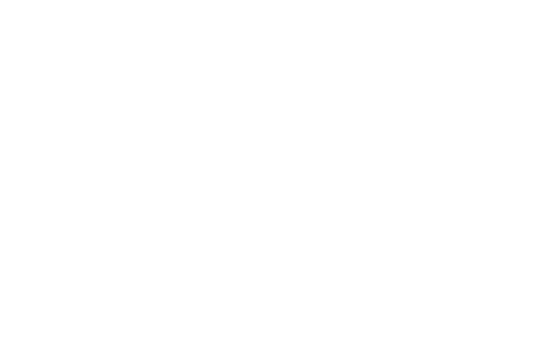

In [197]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()
im = plt.imshow(img_list[0, :, :])

# initialization function: plot the background of each frame
def init():
    im.set_data(np.ones(shape))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(img_list[i, :, :])
    return [im]

ani = FuncAnimation(fig, animate, frames=img_list.shape[0], blit=True, interval=time_res)
#ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=25))
html = display.HTML(ani.to_jshtml())
display.display(html)
plt.close()

In [198]:
%matplotlib inline

In [199]:
img_sum = np.sum(img_list, axis=0)

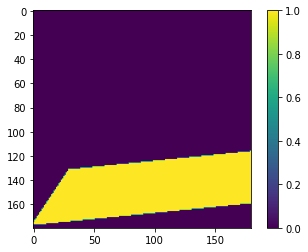

In [200]:
m = plt.imshow(img_sum)
plt.colorbar(mappable=m)

# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
#plt.grid(which='minor', color='w', linestyle='-', linewidth=0.1)

In [201]:
events = convert2event_stream(img_list)

In [202]:
events.shape

(7172, 4)

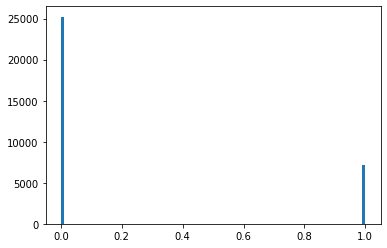

In [203]:
plt.hist(img_sum.flatten(), 100);

In [204]:
def img_from_events(events, shape):
    img = np.zeros(shape)
    for e in events:
        if e[3] == 0:
            continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] = e[0]
    return img

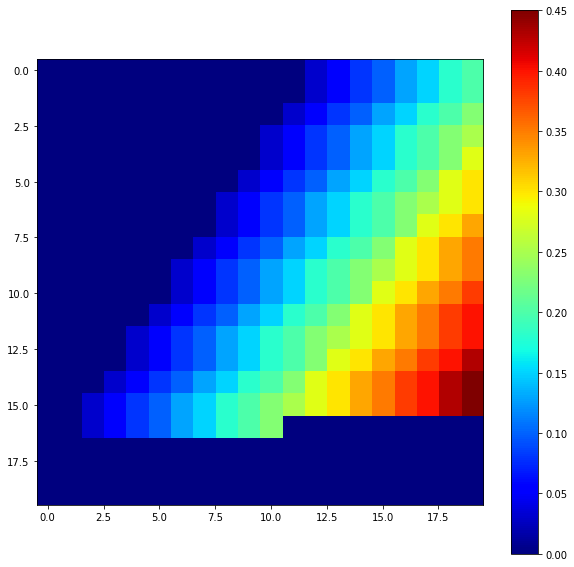

In [214]:
plt.figure(figsize=(10, 10))
m = plt.imshow(img_from_events(events, shape)[160:,:20], interpolation="none", cmap="jet")
plt.colorbar(mappable=m)

# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
# plt.grid(which='minor', color='w', linestyle='-', linewidth=1)

In [206]:
last_time = np.zeros(shape)
time_difference = np.zeros(shape)
for e in events:
    if e[3] == 0:
        continue
    
    x = int(e[1])
    y = int(e[2])
    
    last_time[y, x] = e[0]
    
    if x == 0:
        continue
    
    if last_time[y, x-1] != 0:
        time_difference[y, x] = e[0] - last_time[y, x-1]

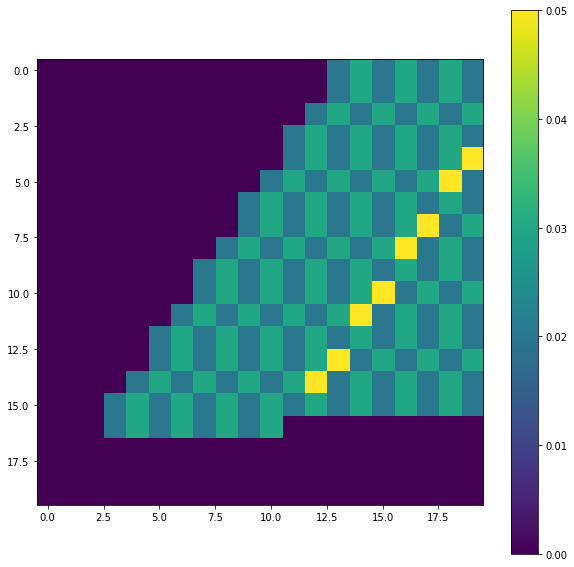

In [212]:
plt.figure(figsize=(10, 10))
m = plt.imshow(time_difference[160:,:20], interpolation="none")
plt.colorbar(mappable=m)
# ax = plt.gca();

# # Major ticks
# ax.set_xticks(np.arange(0, shape[0], 1))
# ax.set_yticks(np.arange(0, shape[1], 1))

# # Labels for major ticks
# ax.set_xticklabels(np.arange(0, shape[0], 1))
# ax.set_yticklabels(np.arange(0, shape[1], 1))

# ax.set_xticks(np.arange(-.5, shape[0], 1), minor=True)
# ax.set_yticks(np.arange(-.5, shape[1], 1), minor=True)
# plt.grid(which='minor', color='w', linestyle='-', linewidth=2)

In [137]:
#shape = (20, 20)
img = plot_line(shape, line_list[0], 0.01)

[0.2 3.1]


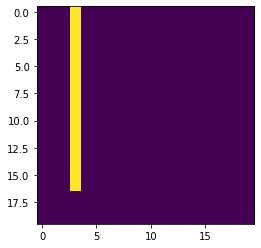

In [19]:
plt.imshow(img)